# Analysis, Comparison and Optimization of various classification algorithms like Decision Tree, Random Forest, and XGBoosting  on Music Genre Classification (MGC) dataset.

### Mainly Focused on data preprocessing and feature selection.

## Data Description

**Music Genre Classfication (MGC) Dataset**

*Secondary Source:* https://www.kaggle.com/datasets/vicsuperman/prediction-of-music-genre?datasetId=1690118 \
*Primary Source:* **Spotify Music** \
*Collection Methodolody:* Spotify API to collect this data

**Number of Instances:** 50,000 \
**Number of Attributes:** 17 **Input Features** + 1 **Target**('Music Genre')

### Attribute Information:
1. instance_id: A unique identifier for each instance in the dataset, represented as a floating-point number. There are 50,000 instances in total.
2. artist_name: The name of the artist who created the track, represented as a string (object).
3. track_name: The name of the track, represented as a string (object).
4. popularity: A measure of the popularity of the track, represented as a floating-point number between 0 and 100. Higher values indicate greater popularity.
5. acousticness: A measure of the acousticness of the track, represented as a floating-point number between 0 and 1. Higher values indicate greater acousticness.
6. danceability: A measure of the danceability of the track, represented as a floating-point number between 0 and 1. Higher values indicate greater danceability.
7. duration_ms: The duration of the track in milliseconds, represented as a floating-point number.
8. energy: A measure of the energy of the track, represented as a floating-point number between 0 and 1. Higher values indicate greater energy.
9. instrumentalness: A measure of the instrumentalness of the track, represented as a floating-point number between 0 and 1. Higher values indicate greater instrumentalness.
10. key: The key in which the track is performed, represented as a string (object). There are 12 possible values: 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', and 'B'.
11. liveness: A measure of the liveness of the track, represented as a floating-point number between 0 and 1. Higher values indicate greater liveness.
12. loudness: A measure of the loudness of the track, represented as a floating-point number in decibels (dB). Higher values indicate greater loudness.
13. mode: The mode in which the track is performed, represented as a string (object). There are two possible values: 'major' and 'minor'.
14. speechiness: A measure of the speechiness of the track, represented as a floating-point number between 0 and 1. Higher values indicate greater speechiness.
15. tempo: The tempo of the track in beats per minute (BPM), represented as a string (object).
16. obtained_date: The date on which the track information was obtained, represented as a string (object).
17. valence: A measure of the valence (positivity) of the track, represented as a floating-point number between 0 and 1. Higher values indicate greater positivity.

18. **music_genre: The genre of the track, represented as a string (object). There are multiple possible genres in the dataset.**

In [1]:
pip install mlflow



     ---------------------------------------- 17.7/17.7 MB 1.5 MB/s eta 0:00:00
     -------------------------------------- 93.9/93.9 kB 890.1 kB/s eta 0:00:00
     ------------------------------------ 184.3/184.3 kB 926.0 kB/s eta 0:00:00
     -------------------------------------- 57.7/57.7 kB 766.1 kB/s eta 0:00:00
     -------------------------------------- 147.5/147.5 kB 1.1 MB/s eta 0:00:00
     -------------------------------------- 41.2/41.2 kB 967.0 kB/s eta 0:00:00
     -------------------------------------- 212.9/212.9 kB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 82.7/82.7 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 133.1/133.1 kB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 78.7/78.7 kB 1.5 MB/s eta 0:00:00
     -------------------------------------- 151.7/151.7 kB 1.5 MB/s eta 0:00:00
     ------------

## Importing important libraries 






In [2]:
import pandas as pd
import numpy as np

# Turn off warnings
import warnings
warnings.filterwarnings('ignore')

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Exploring Datasets

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/Aashish-compo/Anlysis-comparison-and-optimization-of-classification-algorithm-on-Music-Genre-dataset/main/MGC.csv")
data.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


### I. Attributes of Datasets

In [4]:
print(list(data.columns))

['instance_id', 'artist_name', 'track_name', 'popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'obtained_date', 'valence', 'music_genre']


### II. Target Variable or Music genres

In [5]:
print(data.music_genre.value_counts().index)

Index(['Electronic', 'Anime', 'Jazz', 'Alternative', 'Country', 'Rap', 'Blues',
       'Rock', 'Classical', 'Hip-Hop'],
      dtype='object')


In [6]:
data.music_genre.value_counts()

Electronic     5000
Anime          5000
Jazz           5000
Alternative    5000
Country        5000
Rap            5000
Blues          5000
Rock           5000
Classical      5000
Hip-Hop        5000
Name: music_genre, dtype: int64

### III. Distribution -  uniformly distributed dataset

<BarContainer object of 10 artists>

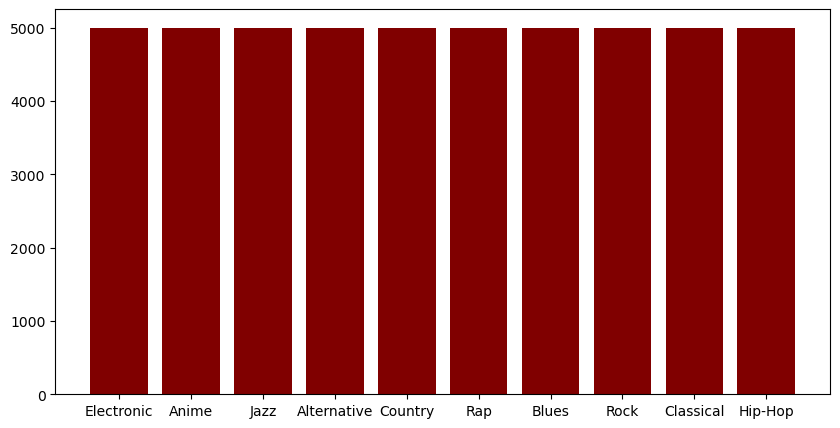

In [7]:
label = data.music_genre.value_counts().index
values =  data.music_genre.value_counts().values
list(label)
list(values)
plt.figure(figsize = (10 , 5))
plt.bar(label , values , color = "maroon")

#### Insight: Data is uniformly distributed

#IV Types of Attributes

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

In [9]:
print(f'Categorical Features: {len([x for x in data.columns if data[x].dtype == object])}')
print(f'Numerical Features: {len([x for x in data.columns if data[x].dtype == float])}')

Categorical Features: 7
Numerical Features: 11


In [10]:
print(data['tempo'].value_counts)

<bound method IndexOpsMixin.value_counts of 0                   100.889
1        115.00200000000001
2                   127.994
3                   128.014
4                   145.036
                ...        
50000     98.02799999999999
50001    122.04299999999999
50002               131.079
50003     75.88600000000001
50004     99.20100000000001
Name: tempo, Length: 50005, dtype: object>


#### Insights : We can see there are 18 features. Out of 18, 7 are categorical and rest are numerical features but tempo should be numerical. So it is handled



### Handelling the Tempo feature:

In [11]:
#TEMPO to '?' issue
data.drop(data[data['tempo'] == '?'].index , inplace = True)
data["tempo"] = data["tempo"].astype(float)

print(f'Categorical Features: {len([x for x in data.columns if data[x].dtype == object])}')
print(f'Numerical Features: {len([x for x in data.columns if data[x].dtype == float])}')


Categorical Features: 6
Numerical Features: 12


# **Descriptive statistics of data**

In [12]:
## For Numerical columns only
data.describe(include=[np.number])

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,45020.000000,45020.000000,45020.000000,45020.000000,4.502000e+04,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000
mean,55884.691892,44.263327,0.306596,0.558532,2.211695e+05,0.599553,0.181843,0.193951,-9.137016,0.093783,119.952961,0.456394
std,20728.197040,15.553972,0.341391,0.178858,1.276884e+05,0.264510,0.325847,0.161715,6.156400,0.101469,30.641701,0.247161
min,20002.000000,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.022300,34.347000,0.000000
25%,38000.750000,34.000000,0.020100,0.442000,1.747230e+05,0.432000,0.000000,0.096900,-10.860000,0.036100,94.941500,0.257000
50%,55857.500000,45.000000,0.145000,0.568000,2.194385e+05,0.642000,0.000159,0.126000,-7.284000,0.048900,119.879000,0.448000
75%,73856.500000,56.000000,0.551000,0.687000,2.686400e+05,0.815250,0.154000,0.244000,-5.177000,0.098800,140.471250,0.648000
max,91759.000000,99.000000,0.996000,0.986000,4.497994e+06,0.999000,0.996000,1.000000,3.744000,0.942000,220.276000,0.992000


In [13]:
## For string/Object type (Categorical) columns only
data.describe(include=['O'])

,artist_name,track_name,key,mode,obtained_date,music_genre
count,45020,45020,45020,45020,45020,45020
unique,6603,38026,12,2,4,10
top,empty_field,Home,G,Major,4-Apr,Rock
freq,2229,16,5130,28874,40301,4561


# **Plot Histograms**


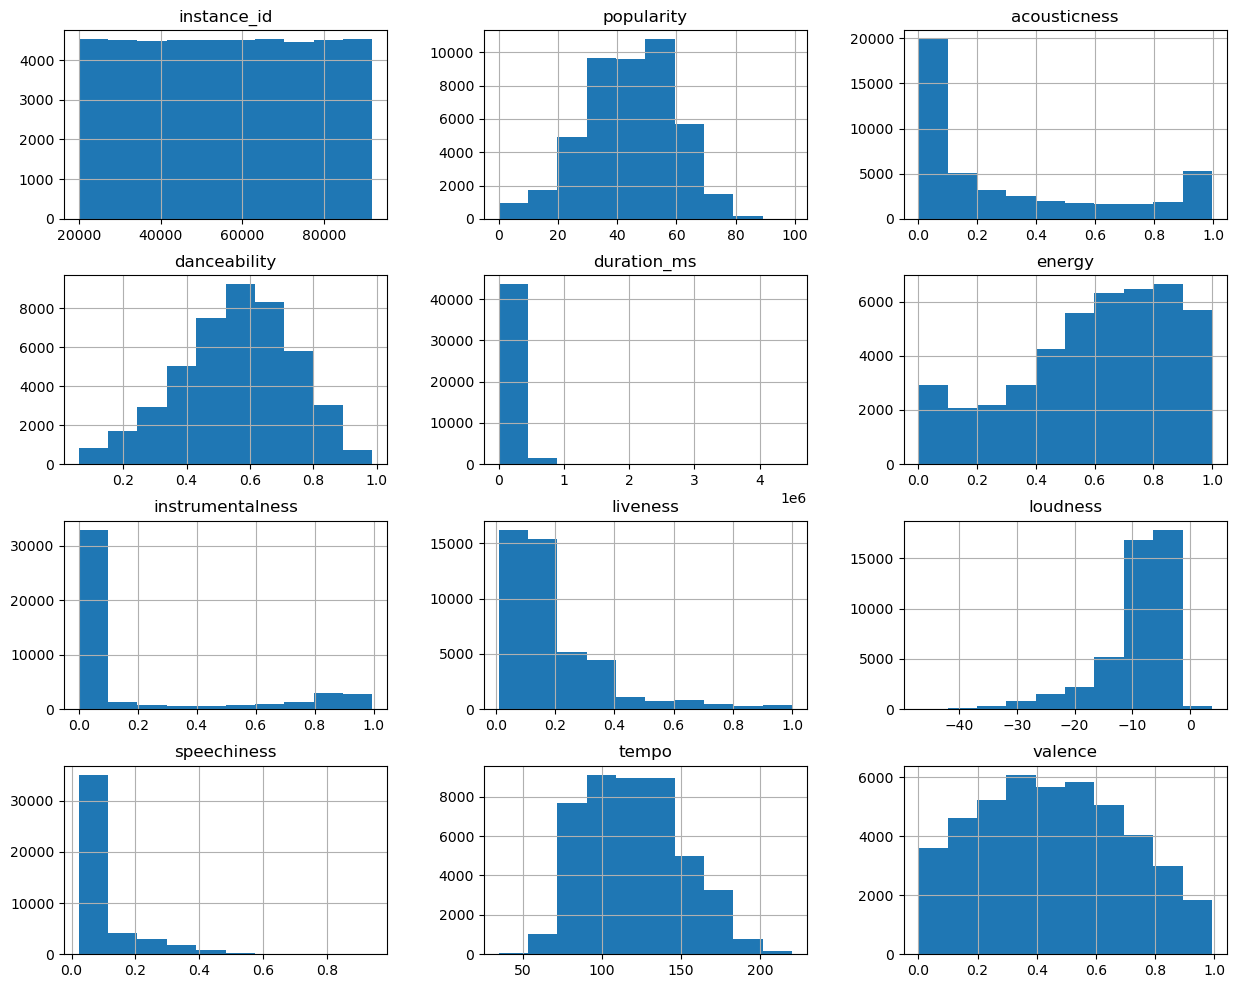

In [14]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (15,12))
ax = plt.axes()
data.select_dtypes(include=np.number).hist(ax =ax)
plt.show()

#### From histogram plot, we can see distribution of each features. #More to add about insights

## Plot for the Features vs target

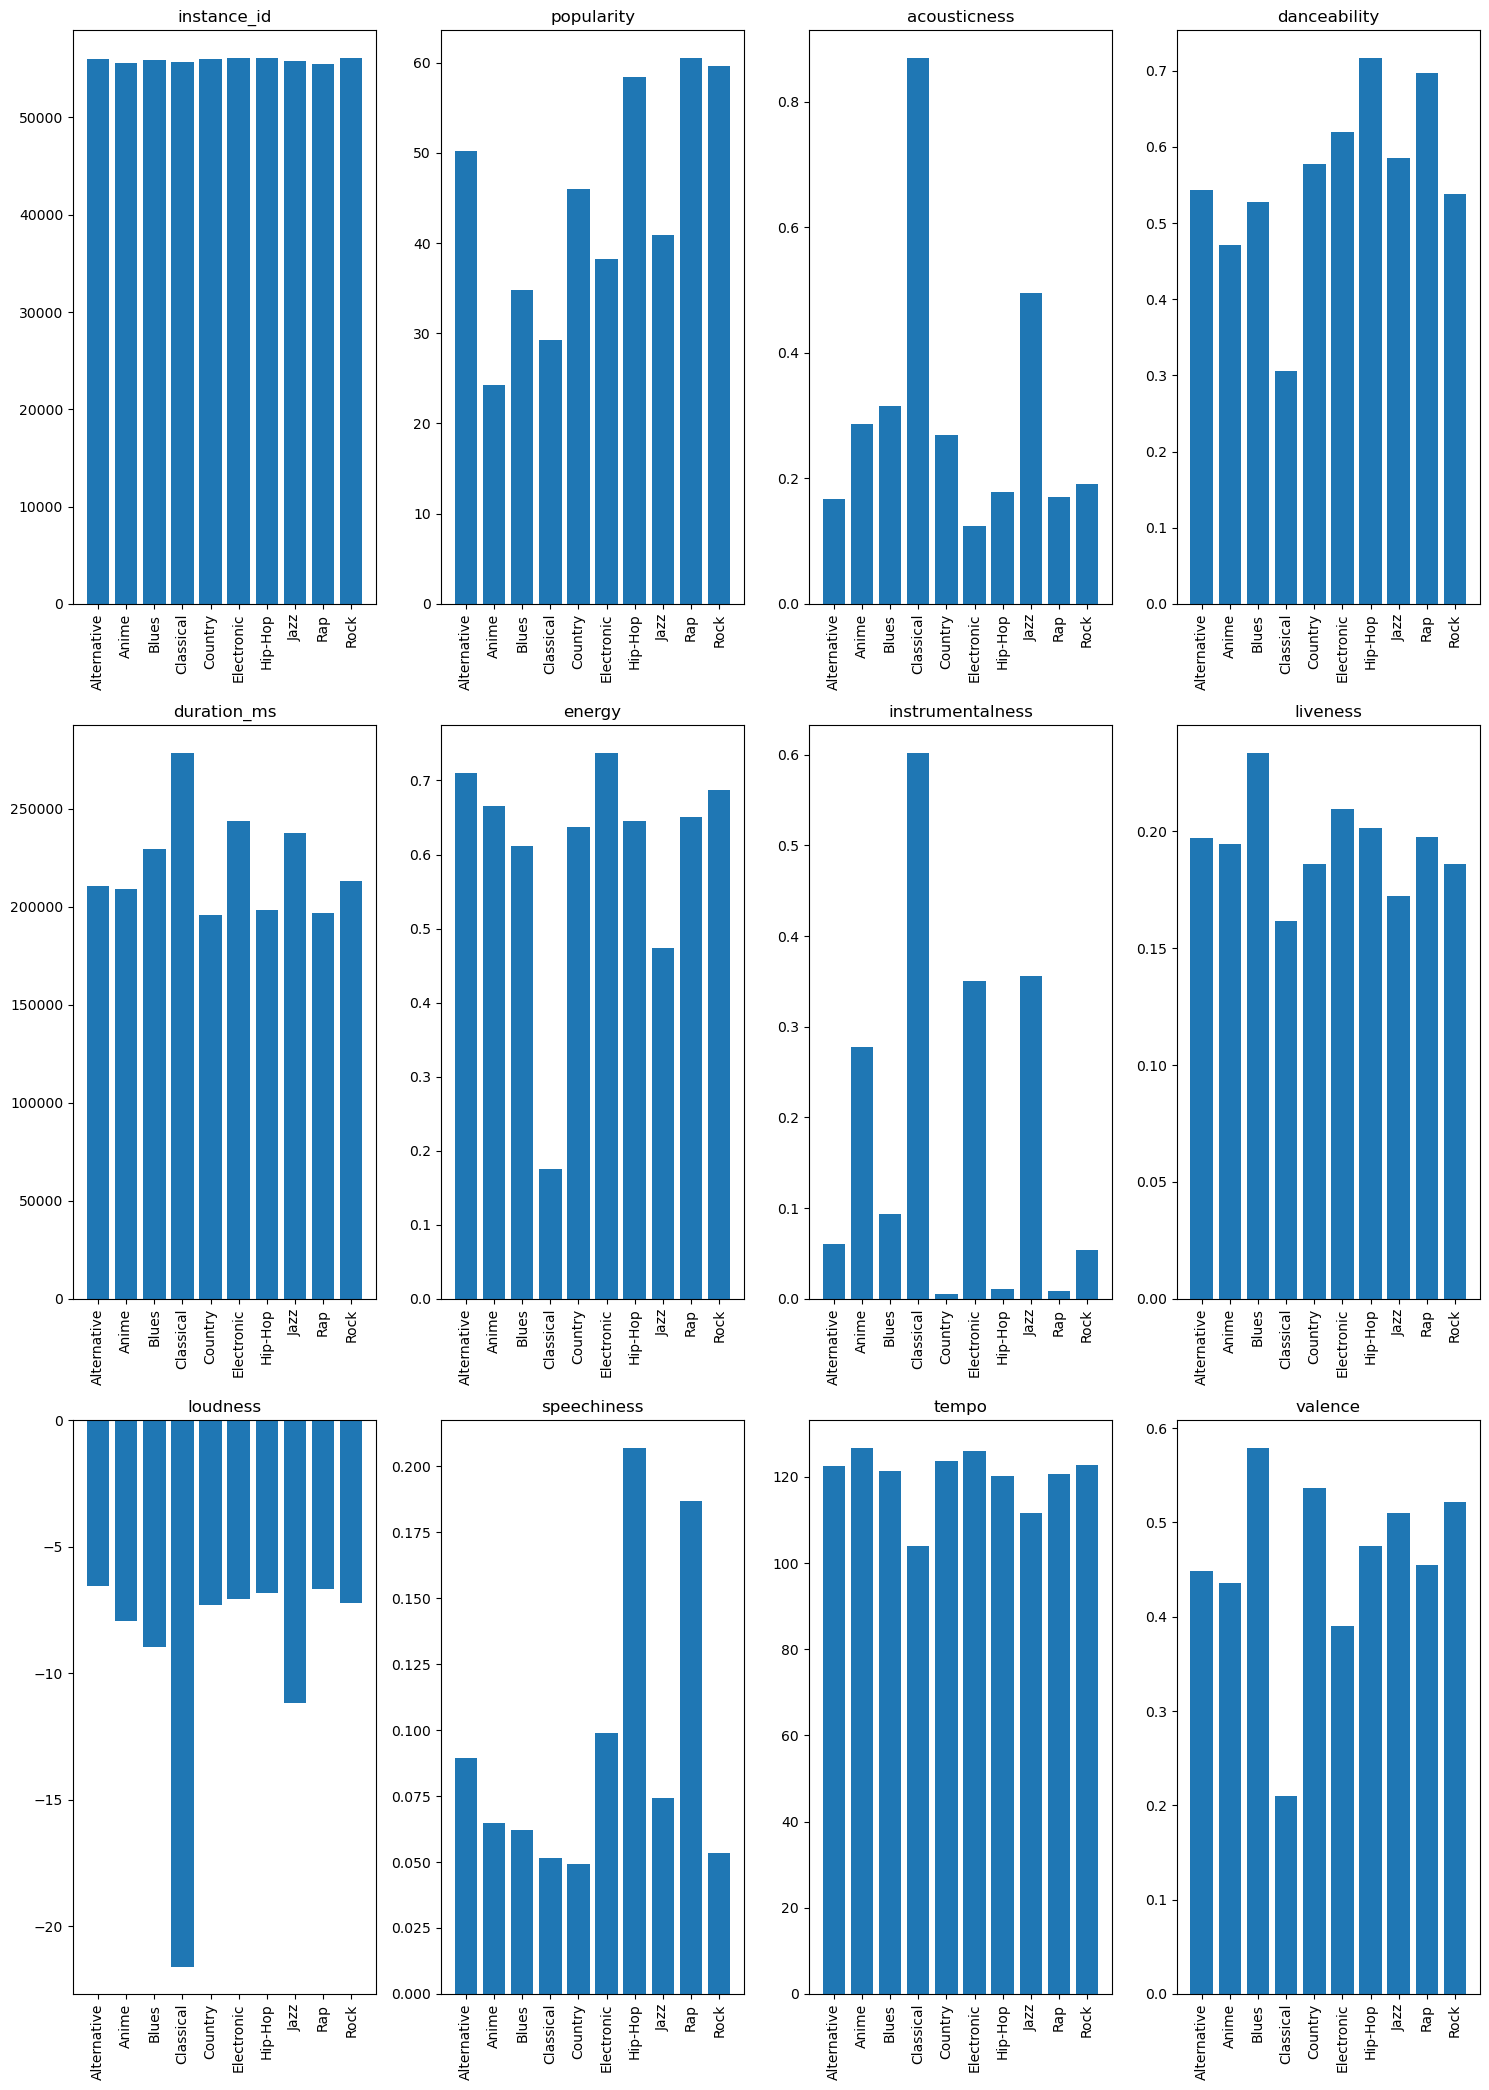

In [15]:
import matplotlib.pyplot as plt

### create the grouped dataframe
grouped = data.groupby("music_genre").mean() 

# create the subplot figure
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 21))

# plot each feature in a separate subplot
for i, col in enumerate(grouped.columns):
    ax = axs[i // 4][i % 4]  # select the appropriate subplot
    ax.bar(grouped.index, grouped[col])
    ax.set_title(col)
    ax.tick_params(axis='x', rotation=90)

# adjust subplot spacing and display the plot
fig.tight_layout()
plt.show() 

## Plot correlation matrix for numerical features


<AxesSubplot:>

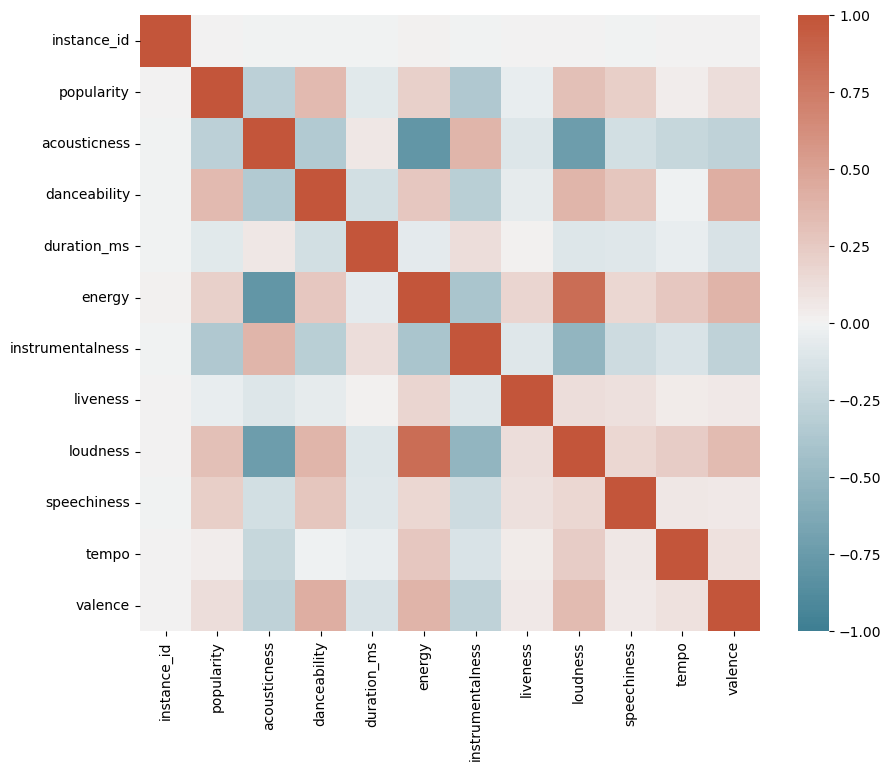

In [16]:
plt.rcParams['figure.figsize'] = 10, 8
sns.heatmap(data.select_dtypes(include=np.number).corr(), 
            vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, n=200))

#### Insight: Here we can see loudness and energy are highly correlated. We can remove one of them.

## Let's see outliers using box plot

<AxesSubplot:>

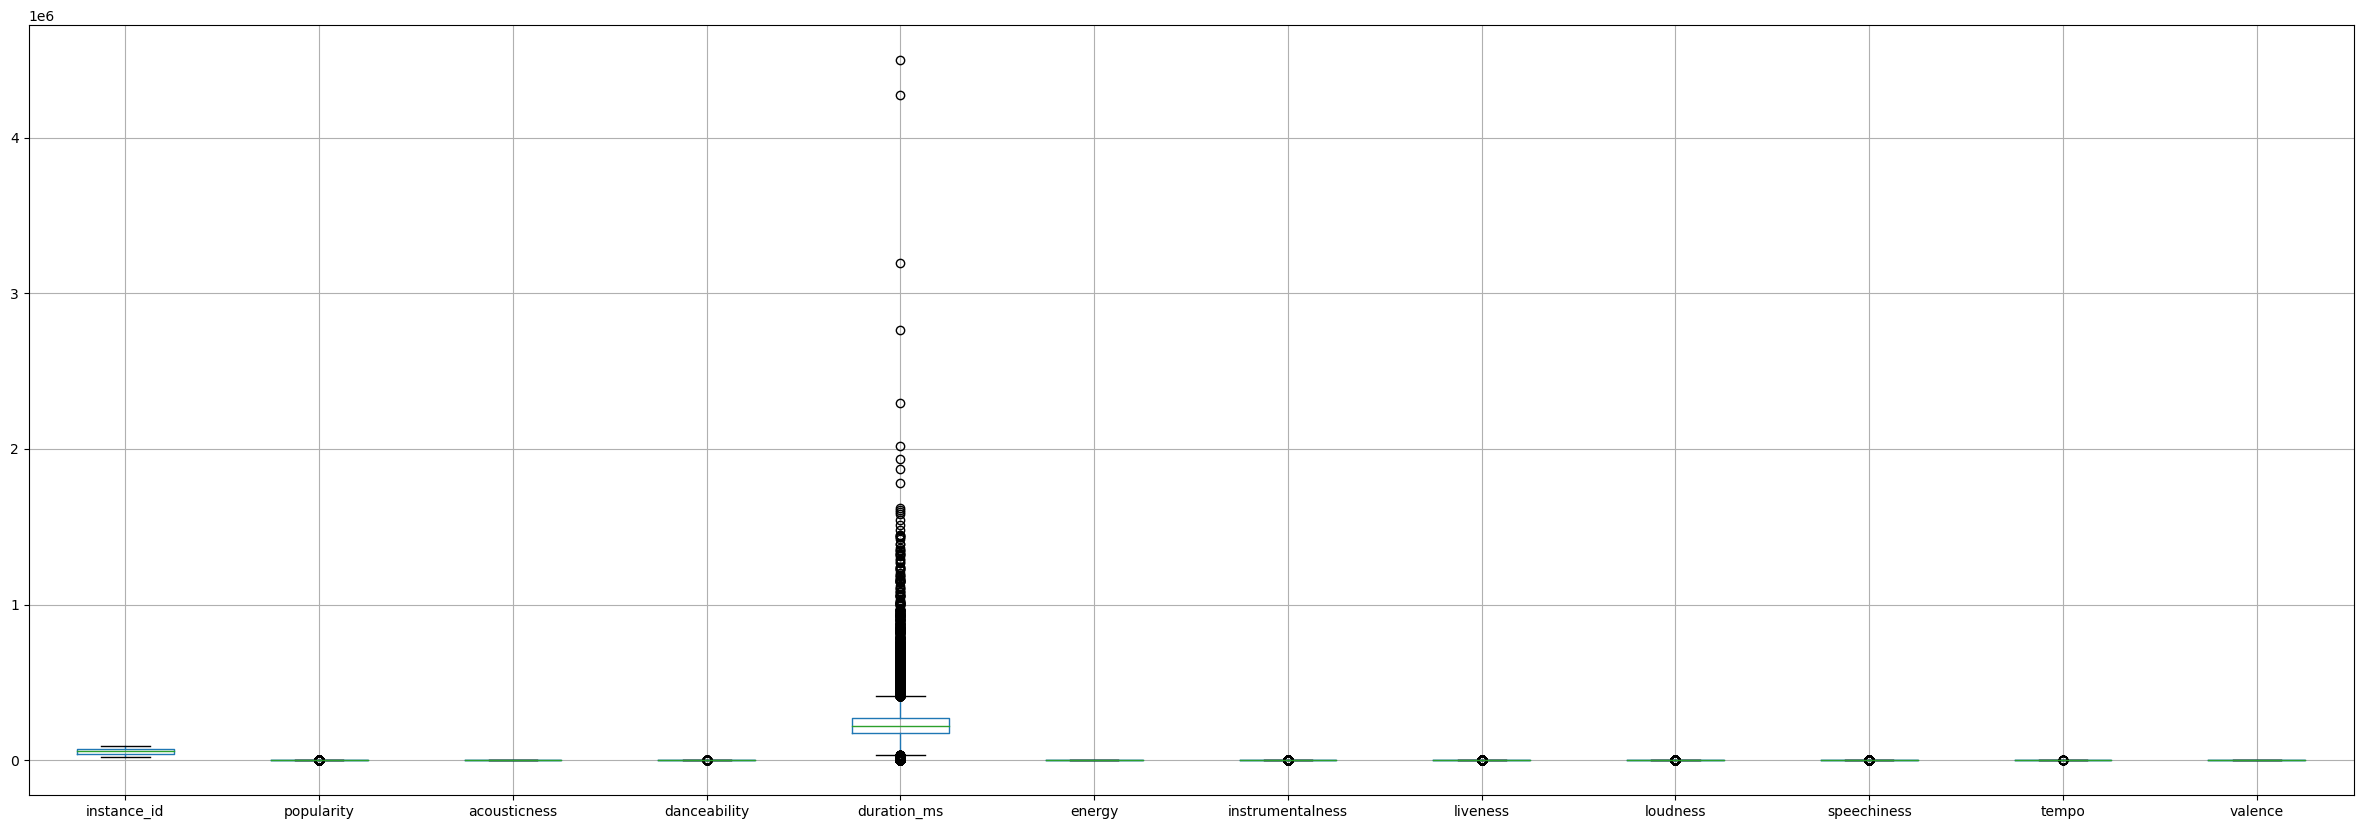

In [17]:
plt.rcParams['figure.figsize'] = 30, 10
data.select_dtypes(include=np.number).boxplot()


#### Insight: We found the most outliers in duration_ms. So handling it...

In [18]:
#converting ms to s
data["duration_ms"]=data["duration_ms"]/(1000)
print(data["duration_ms"].value_counts())

-0.001      4460
 240.000      31
 192.000      28
 180.000      26
 185.600      17
            ... 
 543.440       1
 252.954       1
 167.373       1
 175.693       1
 189.483       1
Name: duration_ms, Length: 24280, dtype: int64


<AxesSubplot:>

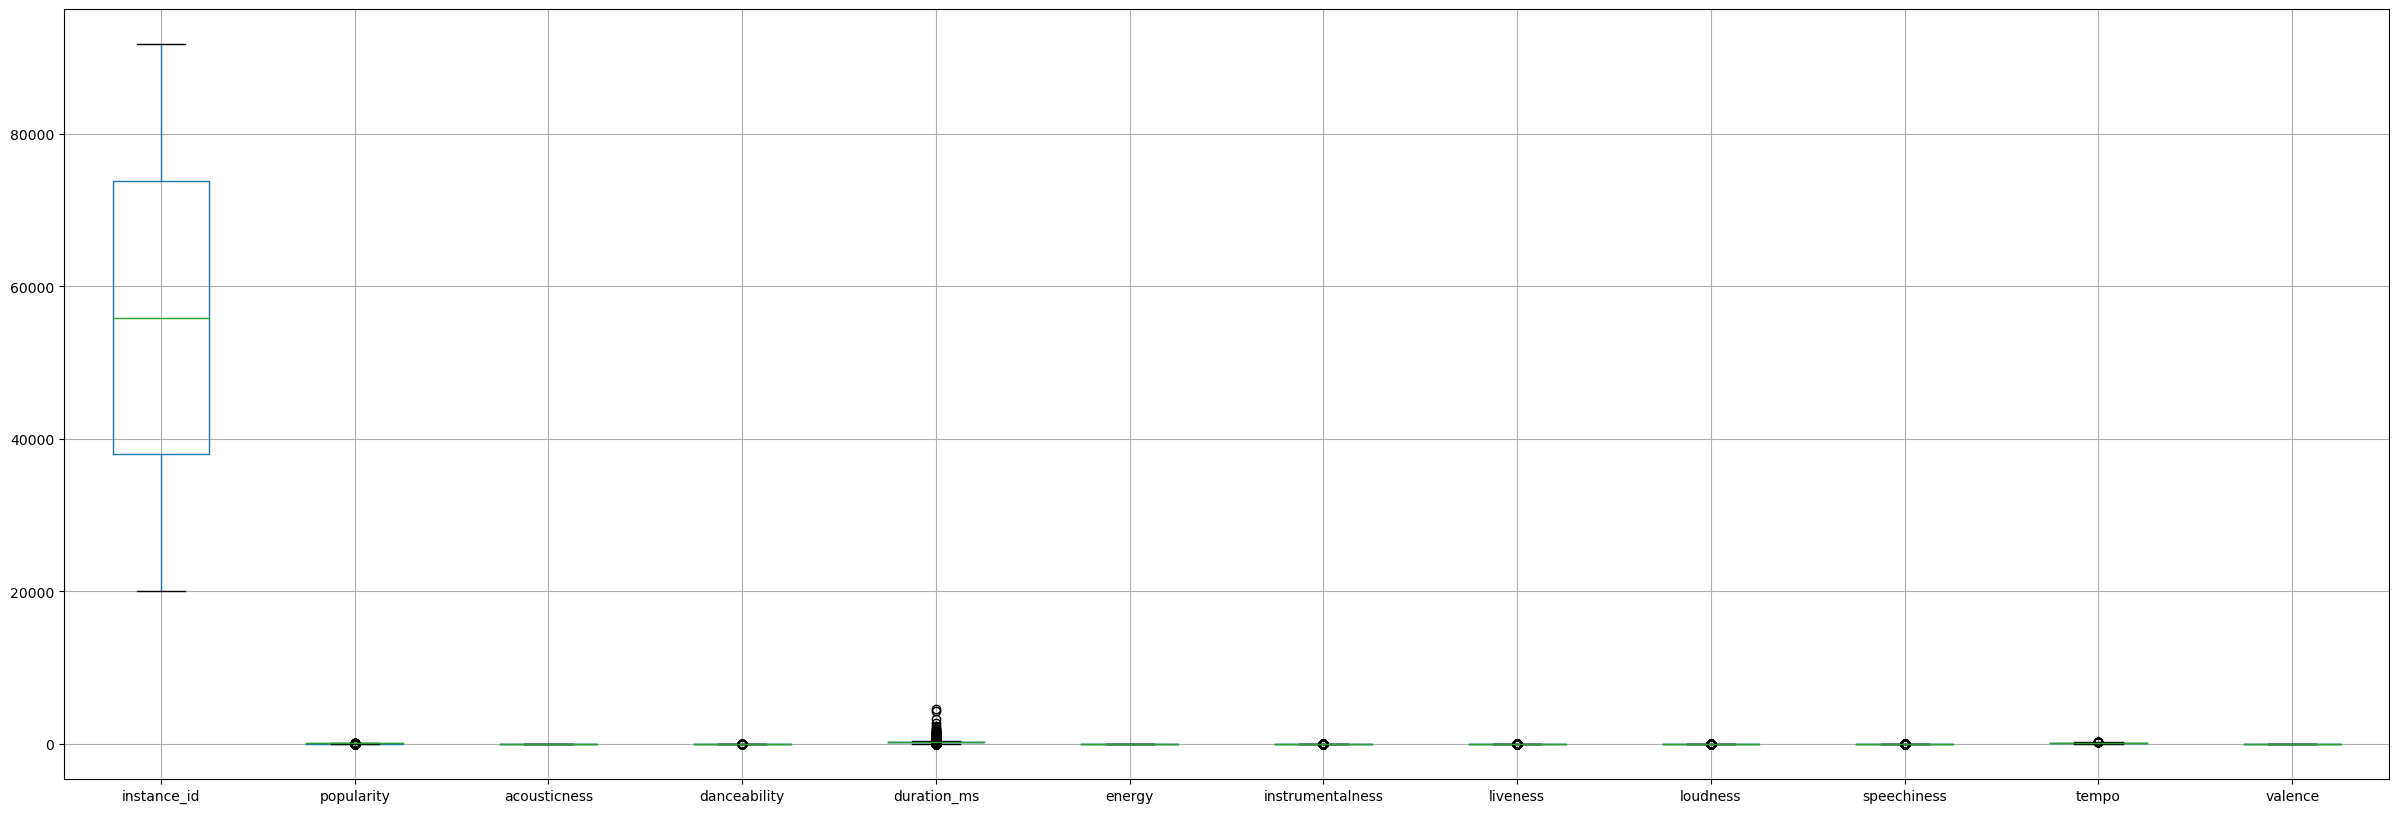

In [19]:
plt.rcParams['figure.figsize'] = 30, 10
data.select_dtypes(include=np.number).boxplot()


### Let's see if our data has missing values

In [20]:
data.isnull().any()

instance_id         True
artist_name         True
track_name          True
popularity          True
acousticness        True
danceability        True
duration_ms         True
energy              True
instrumentalness    True
key                 True
liveness            True
loudness            True
mode                True
speechiness         True
tempo               True
obtained_date       True
valence             True
music_genre         True
dtype: bool

In [21]:
# Number or data that null ??
data.isnull().sum()

instance_id         5
artist_name         5
track_name          5
popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
obtained_date       5
valence             5
music_genre         5
dtype: int64

In [22]:
data.dropna(how='any', inplace=True)

In [23]:
dataset_null=(data.isna().sum()/len(data))*100.0
dataset_null_ratio=dataset_null.drop(dataset_null[dataset_null==0].index).sort_values(ascending=False)
print(dataset_null_ratio)

Series([], dtype: float64)


# Chi-square test

In [24]:
from scipy.stats import chi2_contingency

# Define the categorical feature and the target variable
categorical_df = data.select_dtypes(include=['object'])
reqd=[]

target_variable = 'music_genre'

# Create a contingency table
for x in categorical_df:
  contingency_table = pd.crosstab(data[x], data[target_variable])

# Run the chi-square test
  chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
  #print('Chi-square value:', chi2)
  #print(f'P-value:', p_value)
  if p_value<0.05:
    reqd.append(x)
print(reqd)


['artist_name', 'key', 'mode', 'obtained_date', 'music_genre']


#### Insight: From Hypothesis testing what we found is 'track_name' feature doesn't have significant relationship with our target class. So, this feature can be removed before training our mode.

### Encoding the data and Feature extraction:



In [25]:

from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder object

le = LabelEncoder()

data['key']=le.fit_transform(data['key'])
data['mode']=le.fit_transform(data['mode'])
data['obtained_date']=le.fit_transform(data['obtained_date'])

# encode artist_name
data['artist_code'] = le.fit_transform(data['artist_name'])

#encode music_genre
data['music_genre'] = le.fit_transform(data['music_genre'])



In [26]:
# get artist fit into genre
#Fist let's create some additional features:
''' We created new feature art_genre from the artist_name itself because we needed to find 
the way to use artist_name as a feature as it was highly correlated with the target class 'music_genre' '''

def art_genre(df):
    for i in df.index:
        name = df.loc[i,'artist_code']
        art_genre = np.unique(df[df['artist_code'] == name]['music_genre'])
        df.loc[i,'art_genre'] = str(art_genre)
    return df
art_genre(data)
data['art_genre'] = le.fit_transform(data['art_genre'])

#### Looking into the comuns of dataframe:

In [28]:
data.columns


Index(['instance_id', 'artist_name', 'track_name', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'obtained_date', 'valence', 'music_genre',
       'artist_code', 'art_genre'],
      dtype='object')

#### Plotting the heatmap based on correlation among features and target value.

<AxesSubplot:>

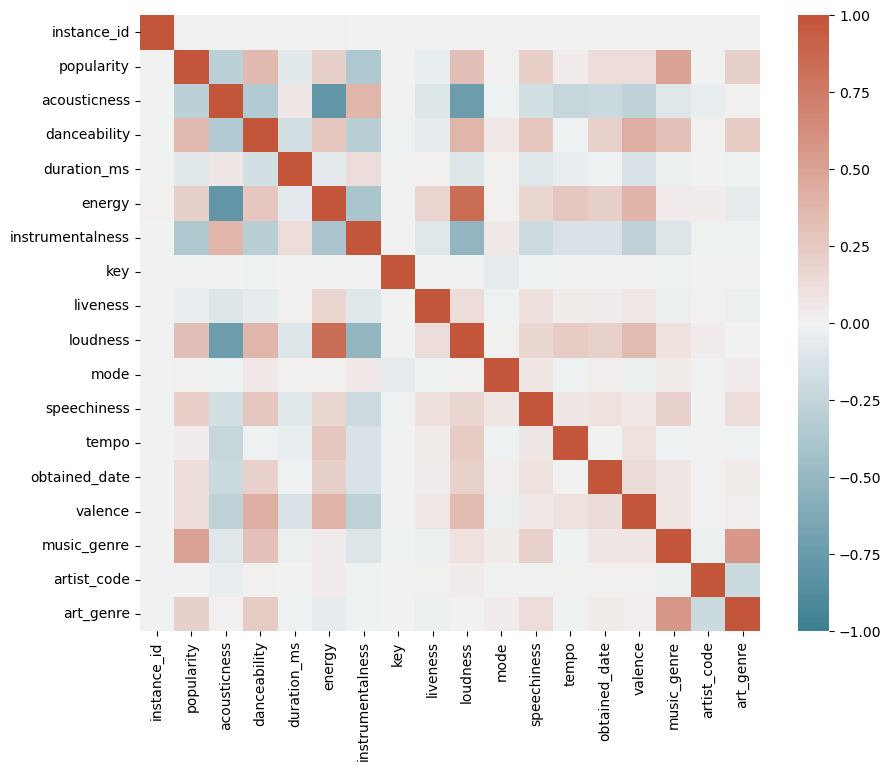

In [29]:
plt.rcParams['figure.figsize'] = 10, 8
sns.heatmap(data.select_dtypes(include=np.number).corr(), 
             vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, n=200))

**Insight: Loudness and energy are positively correlated. So we can remove one of them. Moreover art_genre is highly correlated with music_genre(our target)**

#### Checking the correlation numerically with the target class 'music_genre'

In [30]:
import seaborn as sns

corr_matrix = data.corr()
correlations = corr_matrix['music_genre'].sort_values(ascending=False)
print(correlations)

music_genre         1.000000
art_genre           0.569878
popularity          0.502620
danceability        0.302730
speechiness         0.188814
loudness            0.102907
obtained_date       0.081197
valence             0.077881
mode                0.041013
energy              0.034433
instance_id         0.001240
key                -0.014722
tempo              -0.022762
artist_code        -0.025694
liveness           -0.026354
duration_ms        -0.029463
acousticness       -0.098186
instrumentalness   -0.110771
Name: music_genre, dtype: float64


### Dropping the less correlated features like instance_id, track_name, duration_ms, obtained_date, tempo, liveness AND also the unwanted features like energy as the loudness will take care of it as they are highly correlated, artist_name as we have created new feature called art_genre from artist_name.

In [31]:
data.drop(['instance_id','track_name','artist_name', 'energy', 'duration_ms', 'liveness', 'tempo', 'obtained_date'],axis=1,inplace=True)
data.head()

,popularity,acousticness,danceability,instrumentalness,key,loudness,mode,speechiness,valence,music_genre,artist_code,art_genre
0,27.0,0.00468,0.652,0.79200,1,-5.201,1,0.0748,0.759,5,4833,10
1,31.0,0.01270,0.622,0.95000,5,-7.043,1,0.0300,0.531,5,5880,46
2,28.0,0.00306,0.620,0.01180,11,-4.617,0,0.0345,0.333,5,1527,49
3,34.0,0.02540,0.774,0.00253,4,-4.498,0,0.2390,0.270,5,1638,49
4,32.0,0.00465,0.638,0.90900,9,-6.266,0,0.0413,0.323,5,6268,49


#### Checking the info of the dataframe dropping the uncorrelated features

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45020 entries, 0 to 50004
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        45020 non-null  float64
 1   acousticness      45020 non-null  float64
 2   danceability      45020 non-null  float64
 3   instrumentalness  45020 non-null  float64
 4   key               45020 non-null  int32  
 5   loudness          45020 non-null  float64
 6   mode              45020 non-null  int32  
 7   speechiness       45020 non-null  float64
 8   valence           45020 non-null  float64
 9   music_genre       45020 non-null  int32  
 10  artist_code       45020 non-null  int32  
 11  art_genre         45020 non-null  int32  
dtypes: float64(7), int32(5)
memory usage: 4.6 MB


### Model building

#### Splitting the dataset into the train and test set:

In [33]:
# Splitting the dataset
data.dropna(how='any', inplace=True)
from sklearn.model_selection import train_test_split
X = data.drop(columns=['music_genre'])
y = data['music_genre']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, stratify = y, random_state = 7)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((31514, 11), (13506, 11), (31514,), (13506,))

## 3. Constructing DecisionTree Model with gini and other default parameters

In [34]:
from sklearn.tree import DecisionTreeClassifier ,  export_graphviz
from sklearn import tree
tree_clf = DecisionTreeClassifier(criterion='gini')
tree_clf.fit(X_train , y_train)


DecisionTreeClassifier()

## 4. Evaluating our model of DecisionTree

In [35]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score,confusion_matrix

y_pred_train = tree_clf.predict(X_train) 

#print train f1_score and test f1_score
train_f1_score = f1_score(y_train , y_pred_train ,  average='weighted')
print("Train f1-score = ",train_f1_score)
y_pred = tree_clf.predict(X_test) 


print("Test f1_score= " , train_f1_score)
test_f1_score = f1_score(y_test , y_pred , average='weighted')


#finding accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


from sklearn.metrics import confusion_matrix, classification_report
report = classification_report(y_train, y_pred_train, target_names=['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9'])
print(report)

Train f1-score =  0.9715983557795358
Test f1_score=  0.9715983557795358
Accuracy: 0.7820968458462906
              precision    recall  f1-score   support

     class 0       0.99      1.00      1.00      3146
     class 1       1.00      1.00      1.00      3148
     class 2       1.00      0.99      1.00      3129
     class 3       1.00      1.00      1.00      3150
     class 4       0.97      1.00      0.98      3140
     class 5       0.98      1.00      0.99      3126
     class 6       0.83      1.00      0.91      3164
     class 7       1.00      0.98      0.99      3165
     class 8       0.98      0.79      0.88      3153
     class 9       1.00      0.95      0.98      3193

    accuracy                           0.97     31514
   macro avg       0.98      0.97      0.97     31514
weighted avg       0.98      0.97      0.97     31514



#### Insight : since we see that train f1_score and test f1_score is equal and accuracy is about 78.3%

**Printing the count of each label from the target class.**

In [36]:
print(data['music_genre'].value_counts())

9    4561
7    4521
6    4520
8    4504
3    4500
1    4497
0    4495
4    4486
2    4470
5    4466
Name: music_genre, dtype: int64


## 5. Testing for best depth

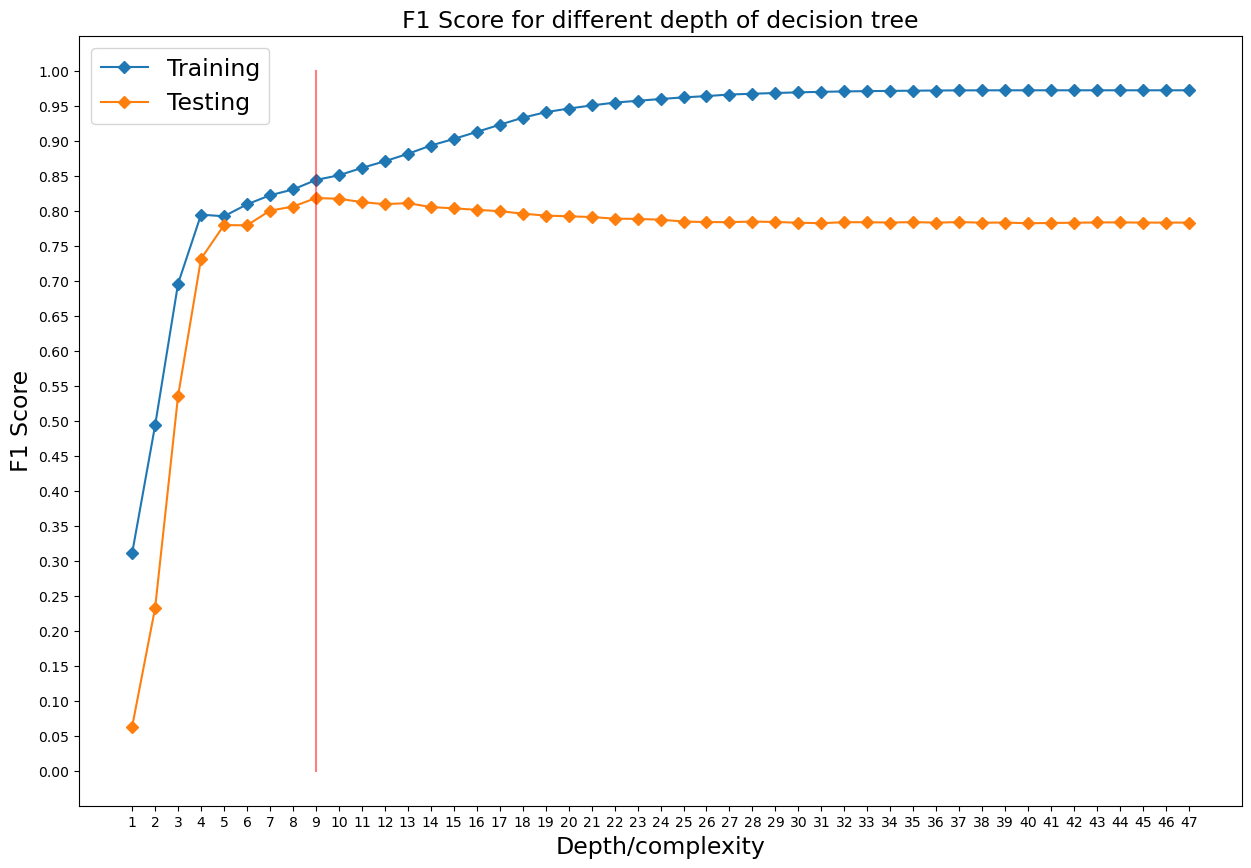

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline


train_scores = []
test_scores = []
for i in range(1, tree_clf.get_depth()+1):
    model = DecisionTreeClassifier(random_state=7, max_depth=i).fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    train_scores.append(f1_score(y_pred_train, y_train, average='weighted'))
    y_pred = model.predict(X_test) # Making Predictions
    test_scores.append(f1_score(y_test, y_pred, average='weighted'))

max_test_score = np.argmax(test_scores) + 1
depth = tree_clf.get_depth()
plt.figure(figsize = (15,10))  
plt.plot(np.arange(1, depth+1, 1), train_scores, marker = 'D', label = 'Training')
plt.plot(np.arange(1, depth+1, 1), test_scores, marker = 'D', label = "Testing")
plt.plot([max_test_score,max_test_score], [0.0, 1.00], '', color = 'red', alpha = 0.5)
plt.xlabel("Depth/complexity", fontsize = 17)
plt.ylabel("F1 Score", fontsize = 17)
plt.title("F1 Score for different depth of decision tree", fontsize = 17)
plt.xticks(np.arange(1, depth+1, 1)) 
plt.yticks(np.arange(0.0, 1.05, 0.05))
plt.legend(fontsize = 17)
plt.show()

 ##Insight: We see that after the depth of 9 the testing f1_score is falling down so optimal depth of our tree would  be that. 




## 6. Evaluating model for the max_depth =9

In [38]:
from sklearn.tree import DecisionTreeClassifier ,  export_graphviz

from sklearn import tree
model = DecisionTreeClassifier(max_depth=9)

model.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=9)

In [39]:

from sklearn.metrics import f1_score

y_pred_train = model.predict(X_train) 
train_f1_score = f1_score(y_train , y_pred_train ,  average='weighted') 
y_pred = tree_clf.predict(X_train) 
test_f1_score = f1_score(y_train , y_pred , average='weighted') 

print("Train f1-score = {} and Test f1-score = {}".format(round(train_f1_score, 2), round(test_f1_score, 2)))
print("The depth of our tree is {}".format(model.get_depth()))

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
from sklearn.metrics import confusion_matrix, classification_report
report = classification_report(y_train, y_pred_train, target_names=['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9'])
print(report)


Train f1-score = 0.84 and Test f1-score = 0.97
The depth of our tree is 9
Accuracy: 0.8187472234562416
              precision    recall  f1-score   support

     class 0       0.77      0.78      0.78      3146
     class 1       0.87      0.99      0.93      3148
     class 2       0.95      0.90      0.93      3129
     class 3       0.99      0.98      0.98      3150
     class 4       0.97      0.84      0.90      3140
     class 5       0.96      0.92      0.94      3126
     class 6       0.60      0.85      0.70      3164
     class 7       0.96      0.90      0.93      3165
     class 8       0.67      0.46      0.55      3153
     class 9       0.78      0.79      0.79      3193

    accuracy                           0.84     31514
   macro avg       0.85      0.84      0.84     31514
weighted avg       0.85      0.84      0.84     31514



## Insight: we can see that even the test f1_score is more than train f1_score.Moreover,accuracy has also increased  to 81.96% .

## 7. Using Random forest algorithm

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# train the classifier on the training data
rfc.fit(X_train, y_train)

# make predictions on the test data
y_pred = rfc.predict(X_test)

# calculate the accuracy score of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
from sklearn.metrics import confusion_matrix, classification_report
report = classification_report(y_train, y_pred_train, target_names=['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9'])
print(report)

Accuracy: 0.787946098030505
              precision    recall  f1-score   support

     class 0       0.77      0.78      0.78      3146
     class 1       0.87      0.99      0.93      3148
     class 2       0.95      0.90      0.93      3129
     class 3       0.99      0.98      0.98      3150
     class 4       0.97      0.84      0.90      3140
     class 5       0.96      0.92      0.94      3126
     class 6       0.60      0.85      0.70      3164
     class 7       0.96      0.90      0.93      3165
     class 8       0.67      0.46      0.55      3153
     class 9       0.78      0.79      0.79      3193

    accuracy                           0.84     31514
   macro avg       0.85      0.84      0.84     31514
weighted avg       0.85      0.84      0.84     31514



## Insights: Accuracy increased by little but not as expected

#Let's perform hyperparameter tuning for Random Forest to get optimised parameter

In [41]:
#all necessary function
def training_basic_classifier(X_train,y_train):
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier(n_estimators=101)
    model.fit(X_train, y_train)
    return model


def predict_on_test_data(model,X_test):
    y_pred = model.predict(X_test)
    return y_pred


def get_metrics(y_true, y_pred):
    from sklearn.metrics import accuracy_score
    acc = accuracy_score(y_true, y_pred)
    return {'accuracy': round(acc, 2)}



def hyper_parameter_tuning(X_train, y_train):
    # define random parameters grid
    n_estimators = [5,21,51,101] # number of trees in the random forest
    max_features = ['auto', 'sqrt'] # number of features in consideration at every split
    max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
    min_samples_split = [2, 6, 10] # minimum sample number to split a node
    min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
    bootstrap = [True, False] # method used to sample data points

    random_grid = {'n_estimators': n_estimators,
                    'max_features': max_features,
                    'max_depth': max_depth,
                    'min_samples_split': min_samples_split,
                    'min_samples_leaf': min_samples_leaf,
                    'bootstrap': bootstrap
                  }
    
    from sklearn.model_selection import RandomizedSearchCV
    from sklearn.ensemble import RandomForestClassifier
    classifier = RandomForestClassifier()
    model_tuning = RandomizedSearchCV(estimator = classifier, param_distributions = random_grid,
                   n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)
    model_tuning.fit(X_train, y_train)

    print ('Random grid: ', random_grid, '\n')
    # print the best parameters
    print ('Best Parameters: ', model_tuning.best_params_, ' \n')

    best_params = model_tuning.best_params_
    
    n_estimators = best_params['n_estimators']
    min_samples_split = best_params['min_samples_split']
    min_samples_leaf = best_params['min_samples_leaf']
    max_features = best_params['max_features']
    max_depth = best_params['max_depth']
    bootstrap = best_params['bootstrap']
    
    model_tuned = RandomForestClassifier(n_estimators = n_estimators, min_samples_split = min_samples_split,
                                         min_samples_leaf= min_samples_leaf, max_features = max_features,
                                         max_depth= max_depth, bootstrap=bootstrap) 
    model_tuned.fit( X_train, y_train)
    return model_tuned,best_params




In [42]:
model = training_basic_classifier(X_train,y_train)

y_pred = predict_on_test_data(model,X_test)
print(y_pred)

run_metrics = get_metrics(y_test, y_pred)
print(run_metrics)

[7 2 5 ... 2 4 1]
{'accuracy': 0.79}


#### MLFlow From here

In [43]:
experiment_name = "basic_classifier" ##basic classifier
run_name="term_deposit"
run_metrics = get_metrics(y_test, y_pred)
print(run_metrics)


{'accuracy': 0.79}


In [44]:
#create an experiment in MLFlow and log parameters and metrics
def create_experiment(experiment_name,run_name, run_metrics,model, run_params=None):
    import mlflow
    #mlflow.set_tracking_uri("http://localhost:5000") #uncomment this line if you want to use any database like sqlite as backend storage for model
    mlflow.set_experiment(experiment_name)
    
    with mlflow.start_run():
        
        if not run_params == None:
            for param in run_params:
                mlflow.log_param(param, run_params[param])
            
        for metric in run_metrics:
            mlflow.log_metric(metric, run_metrics[metric])
        
        mlflow.sklearn.log_model(model, "model")
        
        mlflow.set_tag("tag1", "Random Forest")
        mlflow.set_tags({"tag2":"Randomized Search CV", "tag3":"Production"})
            
    print('Run - %s is logged to Experiment - %s' %(run_name, experiment_name))


In [45]:
create_experiment(experiment_name,run_name,run_metrics,model)

2023/05/04 14:58:48 INFO mlflow.tracking.fluent: Experiment with name 'basic_classifier' does not exist. Creating a new experiment.


Run - term_deposit is logged to Experiment - basic_classifier


In [46]:
#creating another experiment after tuning hyperparameters and log the best set of parameters for which model gives the optimal performance
import mlflow
experiment_name = "optimized model"
run_name="Random_Search_CV_Tuned_Model"
model_tuned,best_params = hyper_parameter_tuning(X_train, y_train)
run_params = best_params

y_pred = predict_on_test_data(model_tuned,X_test) #will return the predicted class
run_metrics = get_metrics(y_test, y_pred)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Random grid:  {'n_estimators': [5, 21, 51, 101], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 101, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}  



In [47]:
print(run_metrics)

{'accuracy': 0.81}


In [48]:
for param in run_params:
    print(param, run_params[param])

n_estimators 101
min_samples_split 2
min_samples_leaf 1
max_features sqrt
max_depth 10
bootstrap False


In [49]:
create_experiment(experiment_name,run_name,run_metrics,model_tuned,run_params)


2023/05/04 15:07:01 INFO mlflow.tracking.fluent: Experiment with name 'optimized model' does not exist. Creating a new experiment.


Run - Random_Search_CV_Tuned_Model is logged to Experiment - optimized model


#XGBoost

In [50]:
from xgboost import XGBClassifier
model= XGBClassifier()
model.fit(X_train,y_train)
y_hat = model.predict(X_test)
print(accuracy_score(y_hat, y_test))
from sklearn.metrics import confusion_matrix, classification_report
report = classification_report(y_train, y_pred_train, target_names=['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9'])
print(report)

0.7937953502147194
              precision    recall  f1-score   support

     class 0       0.77      0.78      0.78      3146
     class 1       0.87      0.99      0.93      3148
     class 2       0.95      0.90      0.93      3129
     class 3       0.99      0.98      0.98      3150
     class 4       0.97      0.84      0.90      3140
     class 5       0.96      0.92      0.94      3126
     class 6       0.60      0.85      0.70      3164
     class 7       0.96      0.90      0.93      3165
     class 8       0.67      0.46      0.55      3153
     class 9       0.78      0.79      0.79      3193

    accuracy                           0.84     31514
   macro avg       0.85      0.84      0.84     31514
weighted avg       0.85      0.84      0.84     31514



In [51]:
from xgboost import XGBClassifier
model= XGBClassifier(n_estimators=101,random_state=42,learning_rate=0.1)
model.fit(X_train,y_train)
y_hat = model.predict(X_test)
print(accuracy_score(y_hat, y_test))
from sklearn.metrics import confusion_matrix, classification_report
report = classification_report(y_train, y_pred_train, target_names=['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9'])
print(report)

0.8187472234562416
              precision    recall  f1-score   support

     class 0       0.77      0.78      0.78      3146
     class 1       0.87      0.99      0.93      3148
     class 2       0.95      0.90      0.93      3129
     class 3       0.99      0.98      0.98      3150
     class 4       0.97      0.84      0.90      3140
     class 5       0.96      0.92      0.94      3126
     class 6       0.60      0.85      0.70      3164
     class 7       0.96      0.90      0.93      3165
     class 8       0.67      0.46      0.55      3153
     class 9       0.78      0.79      0.79      3193

    accuracy                           0.84     31514
   macro avg       0.85      0.84      0.84     31514
weighted avg       0.85      0.84      0.84     31514



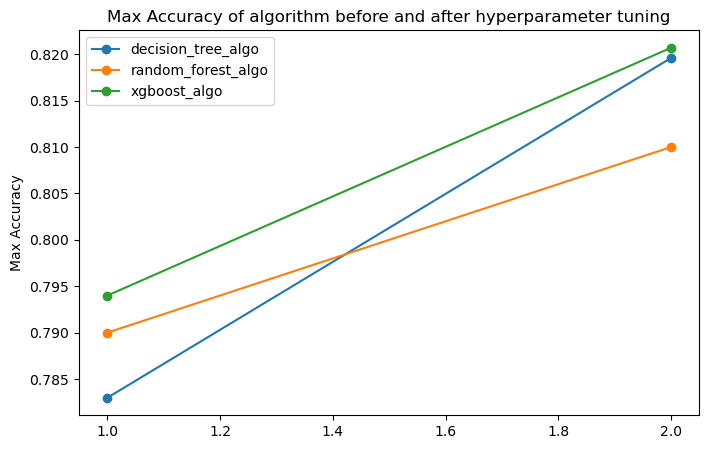

In [52]:
decision_tree_algo =[0.78298,0.8196]
random_forest_algo =[0.79,0.81]
xgboost_algo =[0.794,0.8207]
x=[1,2]
plt.figure(figsize=(8,5))
plt.plot(x, decision_tree_algo, label='decision_tree_algo',marker = 'o')
plt.plot(x, random_forest_algo, label='random_forest_algo',marker = 'o')
plt.plot(x, xgboost_algo, label='xgboost_algo',marker = 'o')

# Add legend
plt.legend()

plt.title('Max Accuracy of algorithm before and after hyperparameter tuning')
plt.ylabel('Max Accuracy')

# Show plot
plt.show()